In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/workspace')
from src import datasets, sca_utils

In [2]:
ds = datasets.ASCADf.Dataset('/mnt/d/Datasets', scale=False, profiling=True)

In [5]:
target_byte = 2
sim = datasets.ASCAD_sim.Dataset(
    ds.plaintext,
    ds.key,
    ds.masks,
    target_byte=target_byte,
    label_transforms=[],
    trace_transforms=[])

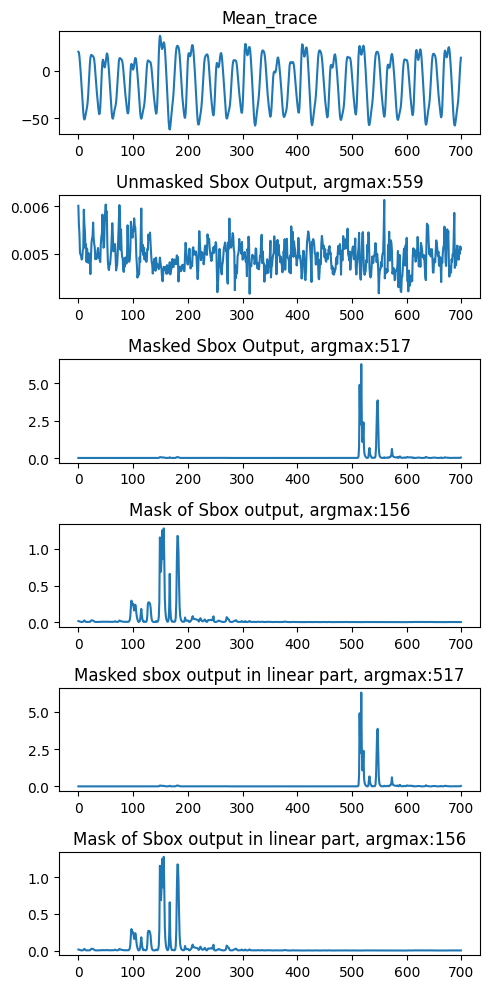

In [6]:
keys = ['Unmasked Sbox Output',
        'Masked Sbox Output',
        'Mask of Sbox output',
        'Masked sbox output in linear part',
        'Mask of Sbox output in linear part']
fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(len(keys)+1, 1, 1)
x = np.array([ds[v][0] for v in range(len(ds))], dtype=np.float32)
ax.plot(x.mean(axis=0))
ax.set_title('Mean_trace')

for i, k in enumerate(keys):
    t = np.array([sim.calc_ivs(v)[i] for v in range(len(ds))], dtype=np.float32)
    snr = sca_utils.snr_fast(x, t)
    ax = fig.add_subplot(len(keys)+1, 1, i+2)
    ax.plot(snr)
    ax.set_title(f'{k}, argmax:{snr.argmax()}')
plt.tight_layout()
plt.show()

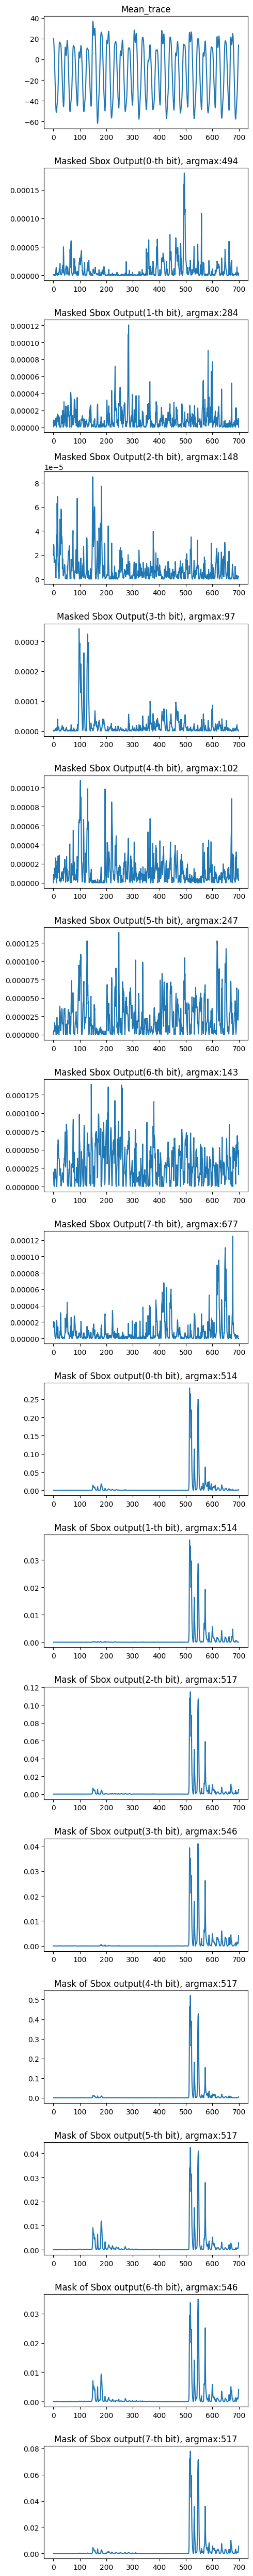

In [7]:
keys = ['Masked Sbox Output',
        'Mask of Sbox output'
        ]
fig = plt.figure(figsize=(5, 50))
ax = fig.add_subplot((len(keys)*8)+1, 1, 1)
x = np.array([ds[v][0] for v in range(len(ds))], dtype=np.float32)
ax.plot(x.mean(axis=0))
ax.set_title('Mean_trace')

for i, k in enumerate(keys):
    for j in range(8):
        f = sca_utils.calc_bit(pos=j)
        t = np.array([f(sim.calc_ivs(v)[i]) for v in range(len(ds))], dtype=np.float32)
        snr = sca_utils.snr_fast(x, t)
        ax = fig.add_subplot(len(keys)*8+1, 1, i*8+j+2)
        ax.plot(snr)
        ax.set_title(f'{k}({j}-th bit), argmax:{snr.argmax()}')
plt.tight_layout()
plt.show()